# Working with Imbalanced Data

### About
When the target column in a dataset has a significantly lower proportion of one class compared to the other, it indicates **imbalanced classification**. In such cases:

- The class with the higher proportion is referred to as the **majority class**.
- The class with the lower proportion is referred to as the **minority class**.

Example: In a medical diagnosis task, you might have 95% of patients without a disease (negative class) and only 5% with the disease (positive class).

### Issues with Imbalanced Data
- **Difficulty in Predicting Minority Class**: Imbalanced data can lead to poor model performance, as most models tend to favor the majority class. 
- **Skewed Performance Metrics**: Evaluation metrics like **accuracy** can be misleading on imbalanced datasets because a model can perform well simply by predicting the majority class. This is why it's important to use other metrics.

To address imbalanced data, there are two primary approaches:

1. **Gather more data**: Collecting additional data to improve the representation of the minority class.
2. **Synthetically improve the data**: Adjusting the dataset distribution using these techniques:
   - **Oversampling the minority class**: Increasing the representation of the minority class by generating more samples.
   - **Downsampling the majority class**: Reducing the size of the majority class to create a more balanced distribution.

One of the most widely used oversampling techniques is **SMOTE** (Synthetic Minority Oversampling Technique). SMOTE works by:

- Focusing on the minority class.
- Generating synthetic data points based on common features and patterns observed within the minority class.
- Creating new instances by analyzing the **nearest neighbors** of the minority class to introduce diversity in the synthetic samples.


## Working with SMOTE

![smote](https://miro.medium.com/v2/resize:fit:850/1*QaNfJwU6P-VnG1zp3U4cVg.png)

Advantages of SMOTE:
- Balances the class distribution (the minority has more data points for the ML model to learn from)
- Fast performance and effectiveness

Disadvantages of SMOTE:
- May cause overfitting
- It's hard to ensure that the synthetic data points properly represent the original data

Recommendations:
- Consider oversampling if you have poor model performance and the ratio is 70:30 (maybe), 80:20 or 85:15 (recommended)
- It's highly recommended to remove outliers before doing SMOTE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/bassel_instructor/Documents/datasets/pima-indians-diabetes.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns = ['Pregnant', 'PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic']
df.head()

,Pregnant,PlasmaGlucose,DiastolicBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

Let's check the class distribution balance

In [4]:
df['Diabetic'].value_counts(normalize=True)

Diabetic
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Diabetic'>

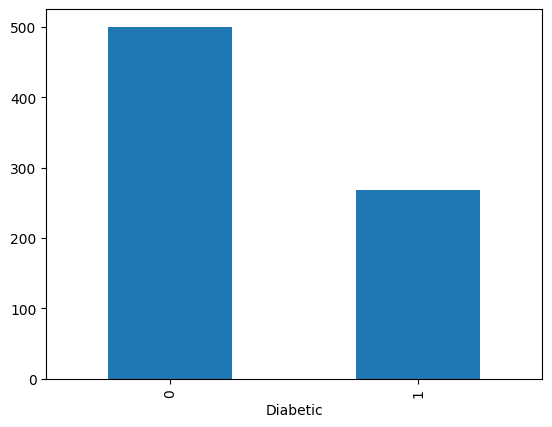

In [5]:
df['Diabetic'].value_counts().plot(kind='bar')

> Note: the class is borderline imbalanced (around 70:30) it's recommended to proceed and see if the model performs well. However, we'll deploy SMOTE in this step for learning purposes.

In [6]:
X = df.drop(columns='Diabetic', axis=1)
y = df['Diabetic']

`pip install imblearn`

In [7]:
from imblearn.over_sampling import SMOTE 

In [8]:
smote_model = SMOTE(random_state=10)

In [9]:
X_resam, y_resam = smote_model.fit_resample(X, y)

In [10]:
X_resam.shape, y_resam.shape

((1000, 8), (1000,))

<Axes: xlabel='Diabetic'>

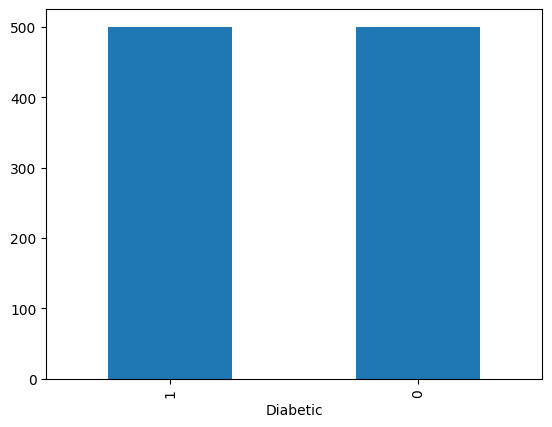

In [11]:
y_resam.value_counts().plot(kind='bar')

- You can control the ratio of upsampling using `sampling_strategy`
- You can control the number of neighbors to consider for kNN upsampling algorithm using `k_neighbors`

![knn](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resam, y_resam, test_size=.2, random_state=15)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
#create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=4) # k is a hyperparameter

#train the model
knn_model.fit(X_train, y_train)
 

KNeighborsClassifier(n_neighbors=4)

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(f'Model Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Model Accuracy: 0.76


Consider using cross-validationa and Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
 
gs_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
gs_model.fit(X_train, y_train)

print("Best Parameters:", gs_model.best_params_)
print("Best Score:", gs_model.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best Score: 0.73375


### Oversampling Alternative (Undersampling)

- One popular alternative method to handle imbalanced data in Python is **undersampling** the majority class.
- It  basically makes the majority matches the distribution ratio of the minority

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
undersampl = RandomUnderSampler(random_state=40)
X_und, y_und = undersampl.fit_resample(X,y)

<Axes: xlabel='Diabetic'>

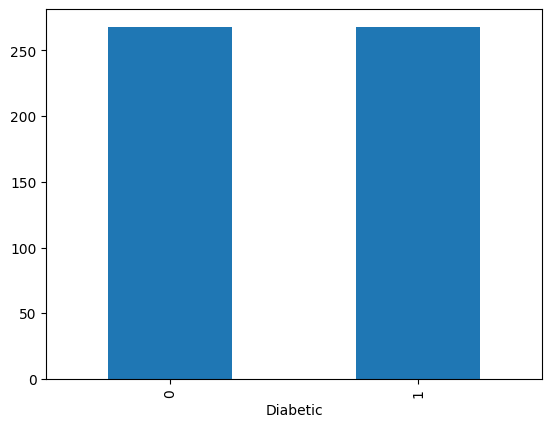

In [20]:
y_und.value_counts().plot(kind='bar')